## Introduction

This tutorial will introduce you to some basic methods for deriving your own classifier and provide an introduction to Linear Discriminant Analysis. Often we run to an already built library, however, the key to building the best classifier could be building one yourself. We will walk through the intuition and logic of building your own classifier below.

### Tutorial content

We will cover the following topics in this tutorial:
- [What is LDA?](#What-is-LDA?)
- [Fisher Linear Discriminant Criterion Function](#Fisher-Linear-Discriminant-Criterion-Function)
- [Installing the libraries](#Installing-the-libraries)
- [Generate the Between Class Scatter Matrix & the Within class scatter matrix](#Generate-the-Between-Class-Scatter-Matrix-&-the-Within-class-scatter-matrix)
- [Find the best projection vector](#Find-the-best-projection-vector)
- [Building a classifier with LDA](#Building-a-classifier-with-LDA)
- [Example with binary classification](#Example-with-binary-classification)
- [Quick Reflection](#Quick-Reflection)
- [Additional Notes- Fisherface](#Additional-Notes--Fisherface)

## What is LDA?

Linear Discriminant Analysis (LDA) is most commonly used as dimensionality reduction technique in the pre-processing step for pattern-classification and machine learning applications. The goal is to project a dataset onto a lower-dimensional space with good class-separability in order avoid overfitting (“curse of dimensionality”) and also reduce computational costs. LDA can also be used for classification such as in this notebook.

# Simple Intuition
Consider that you have two classes that can be models as two individual gaussians (see below). If a new point is introduced and the goal is to do binary classification, there can be some error (the overlap between the two classes).

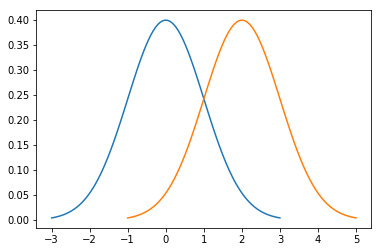

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math

mu1_visual = 0
variance1_visual = 1
sigma1_visual = math.sqrt(variance1_visual)
x1_visual = np.linspace(mu1_visual - 3*sigma1_visual, mu1_visual + 3*sigma1_visual, 100)
plt.plot(x1_visual,mlab.normpdf(x1_visual, mu1_visual, sigma1_visual))


mu2_visual = 2
variance2_visual = 1
sigma2_visual = math.sqrt(variance2_visual)
x2_visual = np.linspace(mu2_visual - 3*sigma2_visual, mu2_visual + 3*sigma2_visual, 100)
plt.plot(x2_visual,mlab.normpdf(x2_visual, mu2_visual, sigma2_visual))

plt.show()

Conceptually, LDA aims to push the means for each class away from each other, while shrinking their variance. The graph below is used for intuition only to drive the point home. As you can see, classifications becomes easier as the two gaussians are barely touching each. Conceptually, this is Linear Discriminant Analysis.

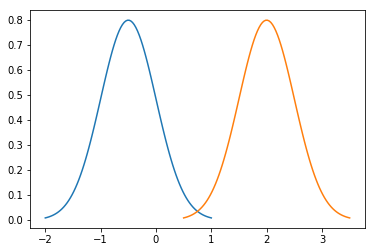

In [2]:
mu1_visual = -0.5
variance1_visual = .25
sigma1_visual = math.sqrt(variance1_visual)
x1_visual = np.linspace(mu1_visual - 3*sigma1_visual, mu1_visual + 3*sigma1_visual, 100)
plt.plot(x1_visual,mlab.normpdf(x1_visual, mu1_visual, sigma1_visual))


mu2_visual = 2
variance2_visual = .25
sigma2_visual = math.sqrt(variance2_visual)
x2_visual = np.linspace(mu2_visual - 3*sigma2_visual, mu2_visual + 3*sigma2_visual, 100)
plt.plot(x2_visual,mlab.normpdf(x2_visual, mu2_visual, sigma2_visual))

plt.show()

## Liner Discrimant Analysis
Now that we have a simple understanding of LDA, let's dive deeper into it. But first, an important note to mention is that LDA assumes that samples are drawn from a gaussian model. As you will see later, classification performance is great when this is the case as because the two gaussians have a higher chance to be linearly separable. Okay now for the good stuff: <br>
<br>
We want to find projections that separate the classes (assuming unimodal Gaussian modes- maximize the distance between two means and minimize variance will lead to minimize overall probability of error).

We want to maximize the distance between the projected means:<br>
e.g. maximize $|\tilde{\mu_1} - \tilde{\mu_2}|^2$ <br>
Where $\tilde{\mu_1}$ is the projected mean $\mu_1$ of class onto LDA direction vector $\textbf{w}$, i.e. <br>
$\tilde{\mu_1}$ $=$ $w^T\mu_1$ <br>
and for class 2: $\tilde{\mu_2}$ $=$ $w^T\mu_2$, thus<br>
$|\tilde{\mu_1} - \tilde{\mu_2}|^2 = |(w^T\mu_1 - w^T\mu_2)|^2$ <br>
$=w^T(\mu_1-\mu_2)(\mu_1-\mu_2)^Tw$ <br>
$=w^TS_Bw$ <br>
where $S_B$ is the Between Class Scatter Matrix <br>
$S_B = (\mu_1-\mu_2)(\mu_1-\mu_2)^T$, where $S_B$ is rank 1.


We also want to minimize the variance (or scatter) of the projected samples from each class. The scatter from class 1 is defined below as: <br>
$\tilde{S_1}^2= \sum\limits_{i=1}^{N_1}$$\tilde{X_i} - \tilde{\mu_1}^2$ <br>
where here $N_1$ is the sample size of class 1. <br>
Thus we want to minimize the scatter of class 1 and class 2 in the projected space, i.e. <br>
minimize the total within-class scatter $\tilde{S_1}^2 + \tilde{S_2}^2$ <br>
Which is equivalent to: $w^TS_WW$
<br>
<br>
$S_W = \sum\limits_{i=1}^C \sum\limits_{i=1}^N$ $(X_j-\mu_i)(X_j-\mu_i)^T$ <br>
where C = 2, N = number of images in the ith class

## Fisher Linear Discriminant Criterion Function

- Objective [1]- We want to maximize the between class scatter defined as: $|\tilde{\mu_1} - \tilde{\mu_2}|^2$ <br>
- Objective [2]- We want to minimize the within-class scatter defined as:
$\tilde{S_1}^2 + \tilde{S_2}^2$ <br>
- Thus we define our objective function J(w) as the following ratio that we want to maximize in order to achieve [1] and [2]: <br>
$J(w) = \frac{|\tilde{\mu_1} - \tilde{\mu_2}|^2}{\tilde{S_1}^2 + \tilde{S_2}^2}$ <br>
or expanded maximize $J(w) = \frac{w^TS_BW}{W^TS_WW}$

### Solving LDA
Taking the partial derivitive of the objective function with respect to w, we get: <br>
$S_W^{-1}S_BW = \lambda w$ <br> <br>
$\textbf{Thus if we want to maximize J(w) we just find the eigenvector w with the largest eigenvalue!!}$

### 2-Class LDA- Closed Form Solution
$w = S_W^{-1}(\mu_1-\mu_2)$

## Installing the libraries

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

## Generate the Between Class Scatter Matrix & the Within class scatter matrix
To generate the $S_W$ and $S_W$ matrix, we code the equations above. See below:

In [4]:
def sB_sW(c1, c2):
    """ Given 2 numpy arrays of size nxm compute the Between Class Scatter Matrix and within-class scatter matrix
        
        Args: 
            Class 1 (numpy array): array of size nxm, where n is the rows or number of samples 
                                    and m is the number of columns or number of features
            Class 2 (numby array): array of size nxm where n is the rows or number of samples 
                                    and m is the number of columns or number of features
            
        Return:
            Between-Class Scatter (numpy array): Square matrix, See equation above
            Within-Class Scatter (numpy array): Square matrix, See equation above
            Class 1 Mean (numpy array): 1xm where m is the number of columns or features
            Class 2 Mean (numpy array): 1xm where m is the number of columns or features
            X (numpy array): mx2*n where n is number of samples in 1 class
        """
    mu1 = np.mean(c1,axis=0,keepdims=True)

    mu2 = np.mean(c2,axis=0,keepdims=True)

    sB = np.outer((mu1-mu2),(mu1-mu2))
    Sw  = np.zeros(np.shape(sB))
    for i,j in enumerate(c1):
        Sw = np.outer((j-mu1),(j-mu1)) + Sw
    for i,k in enumerate(c2):
        Sw = np.outer((k-mu2),(k-mu2)) + Sw

    X = np.hstack((c1.T,c2.T))
    mu = np.mean(X,axis=1)

    return sB,Sw,mu1,mu2,X



# Find the best projection vector
The value J(v) is maximized with the eigenvector corresponding to the
the maximum eigenvalue of $S_w^{-1}S_B$ which is:

In [5]:
def project_vector(Sw, sB):
    """ Given the Between Class Scatter Matrix and within-class scatter matrix compute the projection vector v
        
        Args: 
            Between-Class Scatter (numpy array): Square matrix
            Within-Class Scatter (numpy array): Square matrix

            
        Return:
             projection vector,v (numpy array): 
    """
    Sw_inv = np.linalg.inv(Sw)
    a = np.matmul(Sw_inv,sB)
    #print(np.matmul(Sw_inv,sB))
    [D,V] = np.linalg.eig(a)
#     print(V)
    '''Select the eigenvector that corresponds to the non-zero eigenvalue(s)'''
    '''It can be see that the non-zero eigenvalue corresponds to the first element in D'''
#     print('-----------------------------------')
    #print(V)
    v = V[0]
    #print(v)
    return v


## Building a classifier with LDA
One way to build a classifier using LDA is to take the original means of each class and project those into the new space using the eigenvectors found above. Classification could goes a follows: <br>
1. Find a threshold for classification by projecting the 2 means into the new space and take the average.
2. Project an unseen (test data) sample point into the new space.
3. Classify point as c1 or c2 based off of the threshold from above.

It is important to note that there are many different ways to classify with LDA. For simplicity, I chose to classify from a threshold from the two projected means. See below for an example:

In [6]:
def classifier(v,x_test_1,x_test_2,y_test,mu1,mu2):
    """ Given the test data, X_test & y_test, the projection vector, v, create classifier and compute error.
        
        Args: 
            Projection vector v(numpy array)
            Between-Class Scatter (numpy array): Square matrix
            Within-Class Scatter (numpy array): Square matrix
            x_test data from class 1 (numpy arry)
            x_test data from class 2 (numpy arry)
            y_test (numpy arry)
        
        Return:
             classification (numpy array):
             error (float):
    """
    
    X = np.hstack((x_test_1.T,x_test_2.T))

    x = X.T
        
    thresh = (mu1.dot(v)+mu2.dot(v))/(2)
#     print("thresh",thresh)
    classification = np.zeros(np.shape(x)[0])
    y_test_1 = y_test[y_test==0]
    y_test_2 = y_test[y_test==1]
    new_y_test = np.hstack((y_test_1.T,y_test_2.T))
    #print("new y: ",new_y_test)
    for i,j in enumerate(x):
#         print(x[i].dot(v))
        if((x[i].dot(v)<thresh)):
            classification[i] = 0
        else: 
            classification[i] = 1
        #print(classification[i])
    error = np.sum([classification!=new_y_test])/(1.00*np.shape(new_y_test)[0])
    #print(classification)
    #print(error)
    return classification,error


# Example with binary classification
The following examples goes as follows: <br>
- [1] Generate samples from 2 gaussians with the same variance but different mean values for simpliciy
- [2] Separate the samples into training set and testing set
- [3] Generate the projection vector, v, using the training set
- [4] Use the LDA classifier to classify the testing set
- [5] Retrieve the error (or accuracy)

Generate samples and separate testing and training set.

In [7]:
mean1 = (4, 6)
cov1 = [[.25, 0], 
       [0, .25]]
mean2 = (0, 0)
cov2 = [[.25, 0], 
       [0, .25]]


x_class_1 = np.random.multivariate_normal(mean1, cov1, (40, 1))
x_class_2 = np.random.multivariate_normal(mean2, cov2, (40, 1))
#print(x_class_1[0])
# print(np.mean(x_class_1,axis=0))
# print(np.mean(x_class_2,axis=0))

flat_list_1 = [item for sublist in x_class_1 for item in sublist]
flat_list_2 = [item for sublist in x_class_2 for item in sublist]

shape = np.shape(flat_list_1)

y_1 = np.zeros(shape[0])
y_2 = np.ones(shape[0])
y = np.hstack((y_1,y_2))
y = y[:]
X = np.vstack((flat_list_1,flat_list_2))
# print(np.shape(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
class_1 = X_train[y_train==0]
class_2 = X_train[y_train==1]

y_train_1 = y_train[y_train==0]
y_train_2 = y_train[y_train==1]

x_test_1 = X_test[y_test==0]
x_test_2 = X_test[y_test==1]

y_test_1 = y_test[y_test==0]
y_test_2 = y_test[y_test==1]

Find classification and error using the classifier function

In [9]:
sB_,Sw_,mu1_,mu2_,X_ = sB_sW(class_1,class_2)
v_ = project_vector(Sw_,sB_)

lda_classifier_,error_ = classifier(v_,x_test_1,x_test_2,y_test,mu1_,mu2_)
print("projection vector",v_)
print("error",error_)


projection vector [-0.83185242 -0.44583072]
error 0.0


As you can see, training error is 0% and we were able to correctly classify our testing points in the new projected space. As stated before, 0% for error is not a huge surprise to us. This is because our data was drawn from two separate gaussian models. In the real world, our data is not drawn from a nice normal distribution and therefore there may definitely be error.

# Quick Reflection
Alright I know what you may be thinking, couldn't we have just used a package (yes and we will). But the point wasn't to get quick results. In practice a package might give you good or alright results, but if your application needs even better results, having the intuition to create and derive your own classifier may aid you. 

# Sklearn Linear Discriminant Analysis Package
Below is a quick example of how to use the sklearn.discriminant_analysis package using the same data generated above. To no surprise, the results are similar.

In [10]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X_ = np.vstack((class_1,class_2))
clf = LinearDiscriminantAnalysis()
# print(np.shape(X_))
y_ = np.hstack((y_train_1,y_train_2))
# print(np.shape(y_))
# print(np.shape(X_))
clf.fit(X_, y_)
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
               solver='svd', store_covariance=False, tol=0.0001)
pred = clf.predict(X_test)
print("error", np.sum([pred!=y_test])/np.shape(y_test)[0])

error 0.0


# Additional Notes- Fisherface
A concern that one may have with using LDA is dealing with high dimensional data. If we have more dimensions (m) than samples (n) such as in image classification (high number of pixels and modest number of images), then problems could occur. To solve this problem you first use Principal Component Analysis and keep m-c eigenvectors where c is the number of classes you have. By projecting your data onto these m-c eigenvectos, $S_W$ will now be full rank. Then do LDA and compute the c-1 projections in this lower-dimensional n-c subspace.
### PCA + LDA = Fisherfaces